# Plot SO2 injections

In [11]:
# Import functions
import warnings 
warnings.filterwarnings('ignore')
import os
import iris
import iris.cube
import cf_units
import numpy as np
import numpy.ma as ma
import xarray as xr
import regionmask
import iris.plot as iplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
import matplotlib.colors as colors
from matplotlib.gridspec import GridSpec

## Load and process so2 data

In [12]:
# file path
path = '/data/users/awells/geoMIP/processed_data/UKESM1_Annual_so2_injection_full_'

g6sulf_so2 = xr.open_dataarray(path + 'G6sulfur_2020-2100.nc')
g6con_so2 = xr.open_dataarray(path + 'G6controller_2020-2100.nc')

Calculate total so2 for g6con

In [13]:
g6con_total_so2 = g6con_so2.sum('latitude')

In [14]:
print('G6sulfur total SO2 :', g6sulf_so2.mean('realization').sum().values.round())
print('G6controller total SO2 :', g6con_total_so2.mean('realization').sum().values.round())

G6sulfur total SO2 : 705.0
G6controller total SO2 : 645.0


## Plotting

In [15]:
params = {'legend.fontsize': 20,
          'axes.labelsize': 30,
          'axes.titlesize': 35,
          'axes.linewidth': 8,
          'xtick.labelsize': 25,
          'ytick.labelsize': 25,
          'xtick.major.size': 8,
          'ytick.major.size': 8,
          'axes.grid': True}

plt.rcParams.update(params)

def autosize_figure(nrows, ncolumns, scale_factor=1, xscale_factor=1, yscale_factor=1):
    xwidth = (ncolumns+0.67) * 5.0 * scale_factor * xscale_factor
    ylength = (nrows+0.67) * 3.6 * scale_factor * yscale_factor
    return (xwidth, ylength)

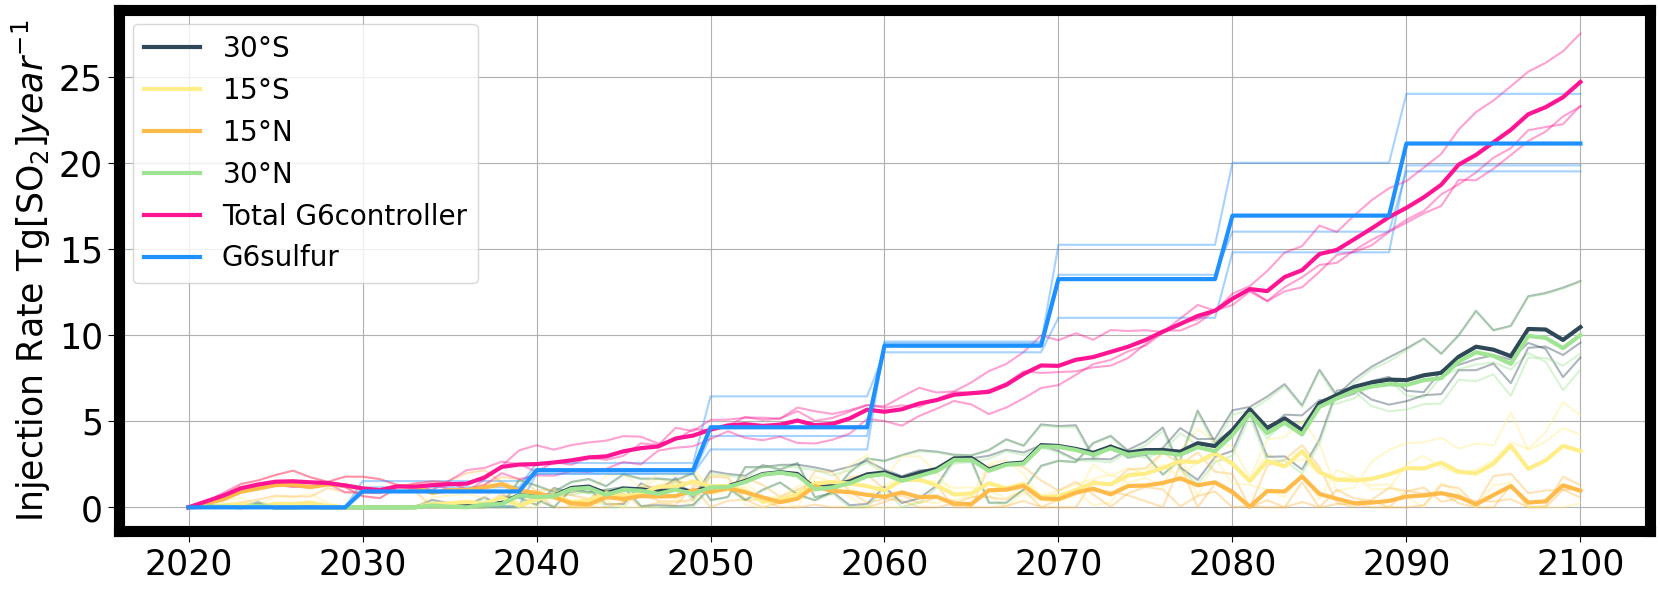

In [16]:
fig = plt.figure(figsize=autosize_figure(1, 1, xscale_factor=2))

for i in range(3):
    g6con_so2.sel(realization=i).sel(latitude=-30).plot(color='#2F4858', alpha=0.4)
    g6con_so2.sel(realization=i).sel(latitude=-15).plot(color='#FFEE88', alpha=0.4)    
    g6con_so2.sel(realization=i).sel(latitude=15).plot(color='#FFBA49', alpha=0.4)    
    g6con_so2.sel(realization=i).sel(latitude=30).plot(color='#9EE493', alpha=0.4)  
    g6con_total_so2.sel(realization=i).plot(color='deeppink', alpha=0.4)
    g6sulf_so2.sel(realization=i).plot(color='dodgerblue', alpha=0.4)
g6con_so2.mean('realization').sel(latitude=-30).plot(color='#2F4858', linewidth=3, label='30$\degree$S')
g6con_so2.mean('realization').sel(latitude=-15).plot(color='#FFEE88', linewidth=3, label='15$\degree$S')
g6con_so2.mean('realization').sel(latitude=15).plot(color='#FFBA49', linewidth=3, label='15$\degree$N')
g6con_so2.mean('realization').sel(latitude=30).plot(color='#9EE493', linewidth=3, label='30$\degree$N')
g6con_total_so2.mean('realization').plot(color='deeppink', linewidth=3, label='Total G6controller')
g6sulf_so2.mean('realization').plot(color='dodgerblue', linewidth=3, label='G6sulfur')
plt.legend()
plt.xlabel('')
plt.ylabel('Injection Rate Tg[SO$_{2}$]$year^{-1}$', fontsize=25)

plt.tight_layout()
plt.savefig('/net/home/h05/awells/PycharmProjects/G6_comparison/Plots/Wells2023/Figure2.png', dpi=200)
plt.show() 